In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from datetime import datetime


In [2]:
# 2021 Lottery data file
wa_lottery_to_load = Path("Resources/2021_lottery_data.csv")

# Read the lottery data file and convert into a single DataFrame
wa_lottery_df = pd.read_csv(wa_lottery_to_load)

# Display the data table for preview
wa_lottery_df.head(10)


,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,1/2/2021,Sat,3-4-11-41-67,5,2,384000000
1,1/6/2021,Wed,1-20-22-60-66,3,3,410000000
2,1/9/2021,Sat,14-26-38-45-46,13,2,470000000
3,1/13/2021,Wed,4-19-23-25-49,14,2,550000000
4,1/16/2021,Sat,14-20-39-65-67,2,3,640000000
5,1/20/2021,Wed,40-53-60-68-69,22,3,730000000
6,1/23/2021,Sat,5-8-17-27-28,14,3,20000000
7,1/27/2021,Wed,17-33-35-42-52,9,3,20000000
8,1/30/2021,Sat,1-2-7-52-61,4,3,30000000
9,2/3/2021,Wed,5-37-40-64-66,5,3,20000000


In [3]:
# Create bar plot showing the most played powerball/powerplay number for each weekday using Pandas.
# Need to use .groupby plus .value_counts to get the number of powerball/powerplay plays for each weekday
weekday_powerball_total = wa_lottery_df.groupby(["weekday"])["powerball"].apply(lambda x: x.mode().to_list())
weekday_powerplay_total = wa_lottery_df.groupby(["weekday"])["powerplay"].apply(lambda x: x.mode().to_list())

# Display the data table for preview
combined_df = pd.concat([weekday_powerball_total, weekday_powerplay_total], axis=1)

combined_df

,powerball,powerplay
weekday,,
Mon,"[8, 24]",[2]
Sat,"[3, 4]",[2]
Wed,"[1, 14]",[2]


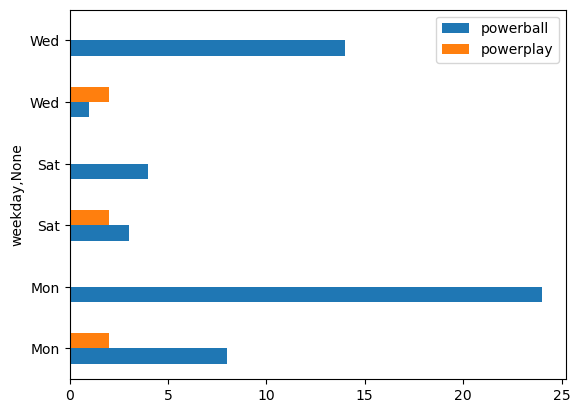

In [4]:
weekday_powerball_total = wa_lottery_df.groupby(["weekday"])["powerball"].apply(lambda x: x.mode())
weekday_powerplay_total = wa_lottery_df.groupby(["weekday"])["powerplay"].apply(lambda x: x.mode())
combined_df = pd.concat([weekday_powerball_total, weekday_powerplay_total], axis=1)
data = combined_df.plot(kind = "barh")
data.set_yticklabels(["Mon","Mon","Sat","Sat", "Wed","Wed"], fontsize = 10)
plt.show()

In [5]:
# Create bar plot showing the most played powerball/powerplay number for each month using Pandas.
# Take a copy of the orginal dataframe "date", "powerball", "powerplay", "jackpot" values
lottery_date_df = wa_lottery_df[["date", "powerball", "powerplay", "jackpot"]].copy()

# convert the date column from(mm/dd/yyyy) to (yyyy-mm-dd)
lottery_date_df["date"] = pd.to_datetime(lottery_date_df["date"])

# Create a new column called month that determines the month based on date 
# https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-and-pandas
lottery_date_df["month"] = lottery_date_df["date"].apply(lambda x:x.strftime("%B"))

# Need to use .groupby plus .agg to get the number of powerball/powerplay plays for each month
powerball_by_month = lottery_date_df.groupby(["month"])["powerball"].agg(lambda x: x.mode().to_list())
powerplay_by_month = lottery_date_df.groupby(["month"])["powerplay"].agg(lambda x: x.mode().to_list())


updated_powerball_by_month = powerball_by_month.apply(lambda x: x if len(x) < 8 else None)
updated_powerplay_by_month = powerplay_by_month.apply(lambda x: x if len(x) < 8 else None)

# Display the data table for preview
combined_by_month_df = pd.concat([updated_powerball_by_month, updated_powerplay_by_month], axis=1)

# Sort series by month ("Jan", "Feb"...."Dec")
# https://stackoverflow.com/questions/67472895/creating-using-categorical-data-type-with-pandas
Months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
combined_by_month_df = combined_by_month_df.reindex(Months, axis =0)


combined_by_month_df

,powerball,powerplay
month,,
January,[14],[3]
February,None,[3]
March,[18],"[2, 3]"
April,None,[2]
May,[8],[2]
June,None,[3]
July,"[3, 10]",[2]
August,[26],[2]
September,[21],[2]


In [6]:
# Create bar plot showing the most played powerball/powerplay number overall.
# Need to use .value_counts to get the number of powerball/powerplay plays for entire data set
# Take .max to find most played powerball/powerplay number 
powerball_total = wa_lottery_df["powerball"].value_counts().idxmax()
powerplay_total = wa_lottery_df["powerplay"].value_counts().idxmax()

#Print results
print(f'Most played powerball number : {powerball_total}')
print(f'Most played powerplay number : {powerplay_total}')

Most played powerball number : 24
Most played powerplay number : 2


In [7]:
# Find the top 3 months with highest jackpot
# Take a copy of lottery_date_df dataframe "date" and "jackpot" values
jackpot_df = lottery_date_df[["date", "jackpot"]].copy()

# Create a new column called month that determines the month based on date 
# https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-and-pandas
jackpot_df["month"] = jackpot_df["date"].apply(lambda x:x.strftime("%B"))

# Need to use .groupby plus .value_counts to get the number of powerball/powerplay plays for each month
jackpot_by_month = lottery_date_df.groupby(["month"])["jackpot"].value_counts()

# Take .max to find most played powerball/powerplay number for each month
max_jackpot_powerball = jackpot_by_month.groupby(["month"]).idxmax().values

# Assemble the resulting series into a single summary DataFrame
combined_jackpot_df = pd.DataFrame({"Data": max_jackpot_powerball})

# Split dataframes into two dataframe then convet data from ( , ) to two new columns
jackpot_split_df = pd.DataFrame(combined_jackpot_df["Data"].tolist(), columns = ["Months","Highest Jackpot Per Month"])

# Convert Powerball Most Played Number and 	Powerpplay Most Played Number to int for ploting
jackpot_split_df["Highest Jackpot Per Month"] = jackpot_split_df["Highest Jackpot Per Month"].astype(int)

# Categorize Dataframe by Month ("Jan", "Feb"...."Dec")
# https://stackoverflow.com/questions/67472895/creating-using-categorical-data-type-with-pandas
jackpot_split_df["Months"] = pd.Categorical(jackpot_split_df["Months"], categories = ["January", "February", "March", "April", "May", "June", 
                                                                                                        "July", "August", "September", 
                                                                                                        "October", "November", "December"], ordered = True)
# Sort DataFrame by months and reset index 
jackpot_df = jackpot_split_df.sort_values(["Months"]).reset_index(drop = True)

# Sort the schools by `Highest Jackpot Per Month' in ascending order and display the top 5 rows.
top_5_jackpot = jackpot_df.sort_values(by = "Highest Jackpot Per Month", ascending=False)

# Display the data table for preview
top_5_jackpot.head(5).reset_index(drop = True)

,Months,Highest Jackpot Per Month
0,September,345000000
1,December,264000000
2,August,211000000
3,May,129000000
4,November,123000000


In [8]:
# Take a copy of the orginal dataframe "weekday" amd "jackpot" values
jackpot_weekday_df = wa_lottery_df[["weekday", "jackpot"]]

# Need to use .groupby plus .value_counts to get the jackpot for each weekday
jackpot_weekday_total = jackpot_weekday_df.groupby(["weekday"])["jackpot"].value_counts()

# Take .max to find most played powerball/powerplay number 
max_jackpot_weekday = jackpot_weekday_total.groupby(["weekday"]).idxmax().values


# Assemble the resulting index into a single summary DataFrame.
jackpot_weekday_combined_df = pd.DataFrame({"Jackpot Weekday Max": max_jackpot_weekday})

#Split both dataframes from ( , ) to two new columns
weekday_jackpot_max_df = pd.DataFrame(jackpot_weekday_combined_df["Jackpot Weekday Max"].tolist(), columns = ["Weekday","Jackpot Weekday Max Value"])

# Display the data table for preview
weekday_jackpot_max_df

,Weekday,Jackpot Weekday Max Value
0,Mon,416000000
1,Sat,30000000
2,Wed,20000000


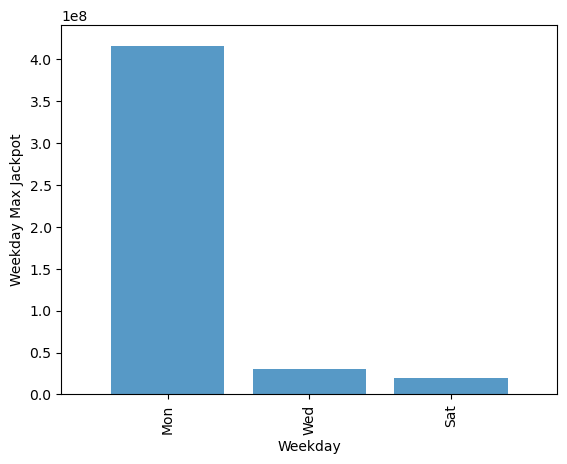

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot bar chart
Weekday = ["Mon", "Wed", "Sat"]
Jackpot  = [416000000, 30000000, 20000000]
x_axis = np.arange(0, len(Jackpot))
tick_locations = [x for x in x_axis]

# Use #1f77b4 for default blue to match bar chart above
plt.bar(x_axis, Jackpot, color="#1f77b4", alpha=0.75, align="center")

# Set the xlimit and ylimit 
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Jackpot) + 25000000)

# Set the xlabel and ylabel 
plt.xlabel("Weekday")
plt.ylabel("Weekday Max Jackpot")

# Set tick location
plt.xticks(tick_locations, Weekday, rotation = 90)

plt.show()
plt.tight_layout()